<a href="https://colab.research.google.com/github/sammysena/Skin-disease-classification/blob/main/Skin_disease_classification_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Skin Disease Image Classification Notebook

In this notebook, we're making an image classifier which can classify six skin diseases: 
* Atopic Dermatitis
* Herpes
* Lyme Disease
* Poison Ivy
* Psoriasis
* Rosacea

Sometimes these skin deseases look similar and indistinguishable with the regular symptoms such as rashes and redish. 

Can we use deep learning to classify these deseases? What model architecture should we use? How should we train our models? This project hopes to answer these questions.

#Import data
The dataset is scraped by selecting top images from Google Images Search by using Chrome [plug-in](https://download-all-images.mobilefirst.me/)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import Python libraries

import os
import zipfile
import random
import tensorflow as tf
import shutil
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np
import string
import random
from random import randint
import warnings
import PIL
from PIL import Image

local_zip = '/content/drive/MyDrive/Colab Notebooks/Skin disease/Skin disease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
print(f"There are {len(os.listdir('/tmp/Skin disease/Atopic Dermatitis/'))} images of Atopic dermatitis.")
print(f"There are {len(os.listdir('/tmp/Skin disease/Herpes/'))} images of Herpes.")
print(f"There are {len(os.listdir('/tmp/Skin disease/Lyme disease/'))} images of Lyme disease.")
print(f"There are {len(os.listdir('/tmp/Skin disease/Poison Ivy/'))} images of Poison ivy.")
print(f"There are {len(os.listdir('/tmp/Skin disease/Psoriasis/'))} images of Psoriasis.")
print(f"There are {len(os.listdir('/tmp/Skin disease/Rosacea/'))} images of Rosacea.")

There are 195 images of Atopic dermatitis.
There are 403 images of Herpes.
There are 322 images of Lyme disease.
There are 227 images of Poison ivy.
There are 349 images of Psoriasis.
There are 156 images of Rosacea.


In [4]:
# Define root directory
root_dir = '/tmp/Disease'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):

  os.makedirs(root_path)
  os.mkdir('/tmp/Disease/training')
  os.mkdir('/tmp/Disease/testing')

  os.mkdir('/tmp/Disease/training/Atopic dermatitis')
  os.mkdir('/tmp/Disease/training/Herpes')
  os.mkdir('/tmp/Disease/training/Lyme disease')
  os.mkdir('/tmp/Disease/training/Poison ivy')
  os.mkdir('/tmp/Disease/training/Psoriasis')
  os.mkdir('/tmp/Disease/training/Rosacea')

  os.mkdir('/tmp/Disease/testing/Atopic dermatitis')
  os.mkdir('/tmp/Disease/testing/Herpes')
  os.mkdir('/tmp/Disease/testing/Lyme disease')
  os.mkdir('/tmp/Disease/testing/Poison ivy')
  os.mkdir('/tmp/Disease/testing/Psoriasis')
  os.mkdir('/tmp/Disease/testing/Rosacea')
  

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/Disease/training
/tmp/Disease/testing
/tmp/Disease/training/Poison ivy
/tmp/Disease/training/Lyme disease
/tmp/Disease/training/Psoriasis
/tmp/Disease/training/Rosacea
/tmp/Disease/training/Herpes
/tmp/Disease/training/Atopic dermatitis
/tmp/Disease/testing/Poison ivy
/tmp/Disease/testing/Lyme disease
/tmp/Disease/testing/Psoriasis
/tmp/Disease/testing/Rosacea
/tmp/Disease/testing/Herpes
/tmp/Disease/testing/Atopic dermatitis


Code the `split_data` function which takes in the following arguments:
- SOURCE: directory containing the files

- TRAINING: directory that a portion of the files will be copied to (will be used for training)
- TESTING: directory that a portion of the files will be copied to (will be used for testing)
- SPLIT SIZE: to determine the portion

The files should be randomized, so that the training set is a random sample of the files, and the test set is made up of the remaining files.

For example, if `SOURCE` is `Skin disease/Herpes`, and `SPLIT` SIZE is .9 then 90% of the images in `Skin disease/Herpes` will be copied to the `TRAINING` dir
and 10% of the images will be copied to the `TESTING` dir.

All images should be checked before the copy, so if they have a zero file length, they will be omitted from the copying process. If this is the case then your function should print out a message such as `"filename is zero length, so ignoring."`. **You should perform this check before the split so that only non-zero images are considered when doing the actual split.**


Hints:

- `os.listdir(DIRECTORY)` returns a list with the contents of that directory.

- `os.path.getsize(PATH)` returns the size of the file

- `copyfile(source, destination)` copies a file from source to destination

- `random.sample(list, len(list))` shuffles a list

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files=[]
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(f'{filename} is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)

In [7]:
# Define paths
ATOPIC_SOURCE_DIR = "/tmp/Skin disease/Atopic Dermatitis/"
HERPES_SOURCE_DIR = "/tmp/Skin disease/Herpes/"
LYME_SOURCE_DIR = "/tmp/Skin disease/Lyme disease/"
POISON_SOURCE_DIR = "/tmp/Skin disease/Poison Ivy/"
PSORIASIS_SOURCE_DIR = "/tmp/Skin disease/Psoriasis/"
ROSACEA_SOURCE_DIR = "/tmp/Skin disease/Rosacea/"

TRAINING_DIR = "/tmp/Disease/training/"
TESTING_DIR = "/tmp/Disease/testing/"

TRAINING_ATOPIC_DIR = os.path.join(TRAINING_DIR, "Atopic dermatitis/")
TESTING_ATOPIC_DIR = os.path.join(TESTING_DIR, "Atopic dermatitis/")

TRAINING_HERPES_DIR = os.path.join(TRAINING_DIR, "Herpes/")
TESTING_HERPES_DIR = os.path.join(TESTING_DIR, "Herpes/")

TRAINING_LYME_DIR = os.path.join(TRAINING_DIR, "Lyme disease/")
TESTING_LYME_DIR = os.path.join(TESTING_DIR, "Lyme disease/")

TRAINING_POISON_DIR = os.path.join(TRAINING_DIR, "Poison ivy/")
TESTING_POISON_DIR = os.path.join(TESTING_DIR, "Poison ivy/")

TRAINING_PSORIASIS_DIR = os.path.join(TRAINING_DIR, "Psoriasis/")
TESTING_PSORIASIS_DIR = os.path.join(TESTING_DIR, "Psoriasis/")

TRAINING_ROSACEA_DIR = os.path.join(TRAINING_DIR, "Rosacea/")
TESTING_ROSACEA_DIR = os.path.join(TESTING_DIR, "Rosacea/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_ATOPIC_DIR)) > 0:
  for file in os.scandir(TRAINING_ATOPIC_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_HERPES_DIR)) > 0:
  for file in os.scandir(TRAINING_HERPES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LYME_DIR)) > 0:
  for file in os.scandir(TRAINING_LYME_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_POISON_DIR)) > 0:
  for file in os.scandir(TRAINING_POISON_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PSORIASIS_DIR)) > 0:
  for file in os.scandir(TRAINING_PSORIASIS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ROSACEA_DIR)) > 0:
  for file in os.scandir(TRAINING_ROSACEA_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_ATOPIC_DIR)) > 0:
  for file in os.scandir(TESTING_ATOPIC_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_HERPES_DIR)) > 0:
  for file in os.scandir(TESTING_HERPES_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_LYME_DIR)) > 0:
  for file in os.scandir(TESTING_LYME_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_POISON_DIR)) > 0:
  for file in os.scandir(TESTING_POISON_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_PSORIASIS_DIR)) > 0:
  for file in os.scandir(TESTING_PSORIASIS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ROSACEA_DIR)) > 0:
  for file in os.scandir(TESTING_ROSACEA_DIR):
    os.remove(file.path)
# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ATOPIC_SOURCE_DIR, TRAINING_ATOPIC_DIR, TESTING_ATOPIC_DIR, split_size)
split_data(HERPES_SOURCE_DIR, TRAINING_HERPES_DIR, TESTING_HERPES_DIR, split_size)
split_data(LYME_SOURCE_DIR, TRAINING_LYME_DIR, TESTING_LYME_DIR, split_size)
split_data(POISON_SOURCE_DIR, TRAINING_POISON_DIR, TESTING_POISON_DIR, split_size)
split_data(PSORIASIS_SOURCE_DIR, TRAINING_PSORIASIS_DIR, TESTING_PSORIASIS_DIR, split_size)
split_data(ROSACEA_SOURCE_DIR, TRAINING_ROSACEA_DIR, TESTING_ROSACEA_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_ATOPIC_DIR))} images of atopic dermatitis for training")
print(f"There are {len(os.listdir(TRAINING_HERPES_DIR))} images of herpes for training")
print(f"There are {len(os.listdir(TRAINING_LYME_DIR))} images of lyme disease for training")
print(f"There are {len(os.listdir(TRAINING_POISON_DIR))} images of poison ivy for training")
print(f"There are {len(os.listdir(TRAINING_PSORIASIS_DIR))} images of psoriasis for training")
print(f"There are {len(os.listdir(TRAINING_ROSACEA_DIR))} images of rosacea for training")

print(f"\nThere are {len(os.listdir(TESTING_ATOPIC_DIR))} images of atopic dermatitis for testing")
print(f"There are {len(os.listdir(TESTING_HERPES_DIR))} images of herpes for testing")
print(f"There are {len(os.listdir(TESTING_LYME_DIR))} images of lyme disease for testing")
print(f"There are {len(os.listdir(TESTING_POISON_DIR))} images of poison ivy for testing")
print(f"There are {len(os.listdir(TESTING_PSORIASIS_DIR))} images of psoriasis for testing")
print(f"There are {len(os.listdir(TESTING_ROSACEA_DIR))} images of rosacea for testing")



There are 175 images of atopic dermatitis for training
There are 362 images of herpes for training
There are 289 images of lyme disease for training
There are 204 images of poison ivy for training
There are 314 images of psoriasis for training
There are 140 images of rosacea for training

There are 20 images of atopic dermatitis for testing
There are 41 images of herpes for testing
There are 33 images of lyme disease for testing
There are 23 images of poison ivy for testing
There are 35 images of psoriasis for testing
There are 16 images of rosacea for testing


#Showing random image in our data

In [ ]:
def load_random_images():
  from IPython.display import Image 

  Atopic_path = '/tmp/Disease/training/Atopic dermatitis/'
  Herpes_path = '/tmp/Disease/training/Herpes/'
  Lyme_path = '/tmp/Disease/training/Lyme disease/'
  Poison_path = '/tmp/Disease/training/Poison ivy/'
  Psoriasis_path = '/tmp/Disease/training/Psoriasis/'
  Rosacea_path = '/tmp/Disease/training/Rosacea/'

  Atopic_dermatitis = random.choice(os.listdir(Atopic_path))
  Herpes = random.choice(os.listdir(Herpes_path))
  Lyme_disease = random.choice(os.listdir(Lyme_path))
  Poison_ivy = random.choice(os.listdir(Poison_path))
  Psoriasis = random.choice(os.listdir(Psoriasis_path))
  Rosacea = random.choice(os.listdir(Rosacea_path))

  print('Atopic dermatitis:')
  Atopic_img = Image(filename = Atopic_path+Atopic_dermatitis)
  display(Atopic_img)

  print('Herpes:')
  Herpes_img = Image(filename = Herpes_path+Herpes)
  display(Herpes_img)

  print('Lyme disease:')
  Lyme_img = Image(filename = Lyme_path+Lyme_disease)
  display(Lyme_img)

  print('Poison ivy:')
  Poison_img = Image(filename = Poison_path+Poison_ivy)
  display(Poison_img)

  print('Psoriasis:')
  Psoriasis_img = Image(filename = Psoriasis_path+Psoriasis)
  display(Psoriasis_img)

  print('Rosacea:')
  Rosacea_img = Image(filename = Rosacea_path+Rosacea)
  display(Rosacea_img)

Atopic dermatitis:


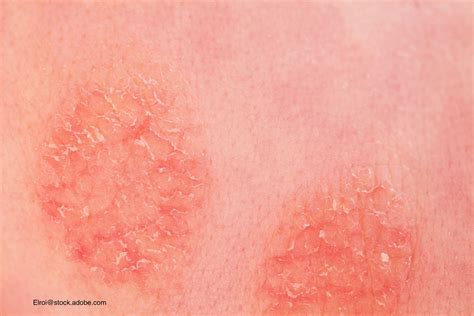

Herpes:


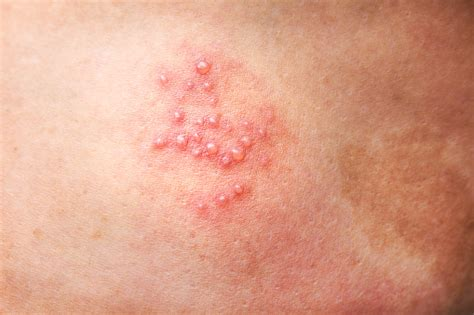

Lyme disease:


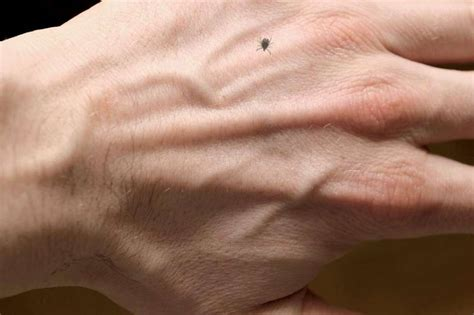

Poison ivy:


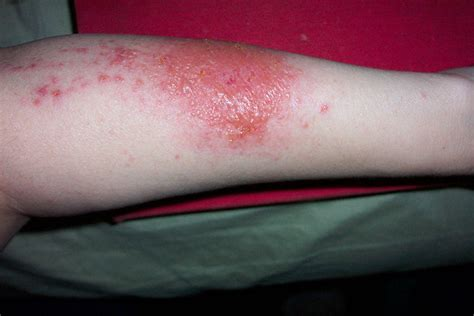

Psoriasis:


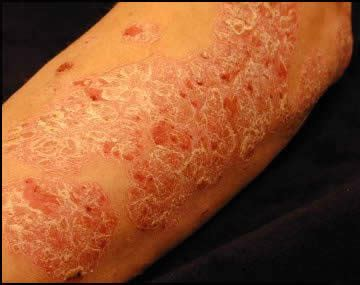

Rosacea:


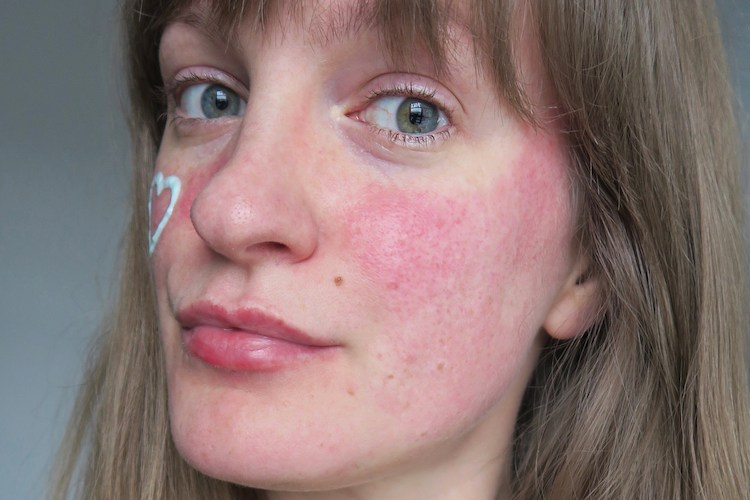

In [ ]:
load_random_images()

#Preprocessing
## Data augmentation

What if you tweak with the images a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). There are other properties on it that you can use to augment the image. 

These are just a few of the options available. Let's quickly go over it:

* `rotation_range` is a value in degrees (0–180) within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [8]:
# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        TESTING_DIR, 
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        class_mode='categorical')

Found 1483 images belonging to 6 classes.
Found 168 images belonging to 6 classes.


Next, we'll prepare functions to plot our training results. There are two metrics which will be shown: accuracy and loss. A good training result will have:

* an increase of accuracy per epoch passed for both training and validation set
* a decrease of loss per epoch passed for both training and validation set
* does not overfit: training accuracy does not surpass validation accuracy by a lot
* does not underfit: training accuracy does not trail behind validation accuracy by a lot

In [9]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.figure(figsize=(5,5))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.figure(figsize=(5,5))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plot_acc(history)
  plot_loss(history)

# Simple CNN model

Epoch 1/20
12/12 [==============================] - 46s 3s/step - loss: 3.9727 - accuracy: 0.1907 - val_loss: 1.7915 - val_accuracy: 0.1377
Epoch 2/20
12/12 [==============================] - 35s 3s/step - loss: 1.7884 - accuracy: 0.2237 - val_loss: 1.7841 - val_accuracy: 0.2455
Epoch 3/20
12/12 [==============================] - 33s 3s/step - loss: 1.7756 - accuracy: 0.2372 - val_loss: 1.7723 - val_accuracy: 0.2455
Epoch 4/20
12/12 [==============================] - 35s 3s/step - loss: 1.7741 - accuracy: 0.2385 - val_loss: 1.7713 - val_accuracy: 0.2455
Epoch 5/20
12/12 [==============================] - 33s 3s/step - loss: 1.7719 - accuracy: 0.2446 - val_loss: 1.7764 - val_accuracy: 0.2455
Epoch 6/20
12/12 [==============================] - 33s 3s/step - loss: 1.7642 - accuracy: 0.2426 - val_loss: 1.7734 - val_accuracy: 0.2455
Epoch 7/20
12/12 [==============================] - 35s 3s/step - loss: 1.7581 - accuracy: 0.2419 - val_loss: 1.7789 - val_accuracy: 0.2395
Epoch 8/20
12/12 [==

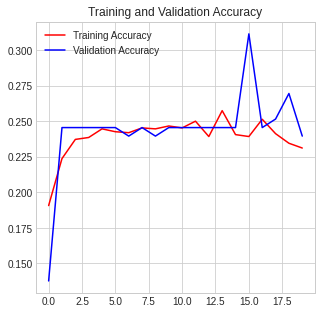

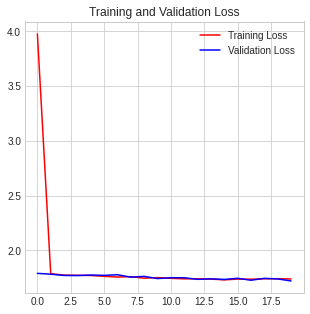

In [ ]:
tf.keras.backend.clear_session()
model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_simple = model_simple.fit(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

plot_history(history_simple)

In [ ]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 16)        0

# Transfer learning using InceptionV3
We can make a more complicated CNN model by taking an existing model, and tweaking it just a little bit more to fit our problem. This process is known as transfer learning.

The main idea is this: instead of teaching a model how to classify images from the beginning, why not take a model which has been proven to be able to classify images, and then tune it a little bit to match our specific case, which is classifying apple products.

Keras has a few pre-trained models. In this notebook, we'll use the InceptionV3 model. The InceptionV3 model has once been trained on the ImageNet database, a large set of data containing multiple objects. You can read more about ImageNet [here](https://en.wikipedia.org/wiki/ImageNet).

Now, we're loading the weights that the model has after being fitted to the ImageNet database.

In [10]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-01-03 04:37:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  23.6MB/s    in 4.7s    

2023-01-03 04:37:40 (17.7 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [11]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [12]:
pre_trained_model = InceptionV3(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = None) 

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# Details on InceptionV3 layers.
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

## Creating callbacks for later

This Callback stops the training proses once an accuracy of 99% is reached.

In [13]:
# Define a Callback class that stops training once accuracy reaches 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

## Pipelining the pre-trained model with your own

Now that the pre-trained model is ready, you need to "glue" it to your own model to solve the task at hand.

For this you will need the last output of the pre-trained model, since this will be the input for your own.

**Note:** On this experiment we use the `mixed7` layer as the last layer of the pre-trained model. However, after submitting feel free to come back here and play around with this.

In [14]:
last_desired_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_desired_layer.output_shape)
last_output = last_desired_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 17, 17, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


Now we will create the final model by adding some additional layers on top of the pre-trained model.

We will need to use Tensorflow's [Functional API](https://www.tensorflow.org/guide/keras/functional) for this since the pretrained model has been created using it.

To create the final model, we will use Keras' Model class by defining the appropriate inputs and outputs as described in the first way to instantiate a Model in the [docs](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

Note that we can get the input from any existing model by using its `input` attribute and by using the Funcional API we can use the last layer directly as output when creating the final model.

#Experimenting to increase model accuracy
In this notebook we are going to do trial and error to increase model accuracy. We are going to start by tweeking our layers, then we going to tune our hyperparameters. Here are some of the hyperparameter that we are tuning.
*   Drop out rate
*   Neuron dense
*   Learning rate

#Second experiment
Now adding dense layer.

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dense = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dense.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dense = model_add_dense.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 65s - loss: 5.1947 - accuracy: 0.2615 - val_loss: 1.5526 - val_accuracy: 0.4551 - 65s/epoch - 5s/step
Epoch 2/80
12/12 - 39s - loss: 1.5674 - accuracy: 0.3888 - val_loss: 1.4769 - val_accuracy: 0.4731 - 39s/epoch - 3s/step
Epoch 3/80
12/12 - 38s - loss: 1.3940 - accuracy: 0.4629 - val_loss: 1.4559 - val_accuracy: 0.4671 - 38s/epoch - 3s/step
Epoch 4/80
12/12 - 48s - loss: 1.4532 - accuracy: 0.4549 - val_loss: 1.2944 - val_accuracy: 0.5090 - 48s/epoch - 4s/step
Epoch 5/80
12/12 - 40s - loss: 1.2921 - accuracy: 0.5108 - val_loss: 1.4252 - val_accuracy: 0.4611 - 40s/epoch - 3s/step
Epoch 6/80
12/12 - 34s - loss: 1.2559 - accuracy: 0.5323 - val_loss: 1.2950 - val_accuracy: 0.5868 - 34s/epoch - 3s/step
Epoch 7/80
12/12 - 34s - loss: 1.2303 - accuracy: 0.5377 - val_loss: 1.2727 - val_accuracy: 0.5749 - 34s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.1607 - accuracy: 0.5499 - val_loss: 1.1679 - val_accuracy: 0.6048 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

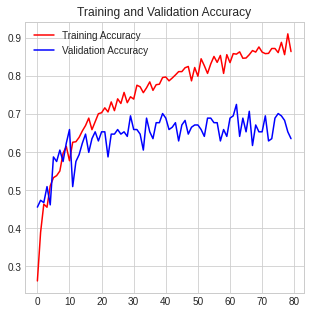

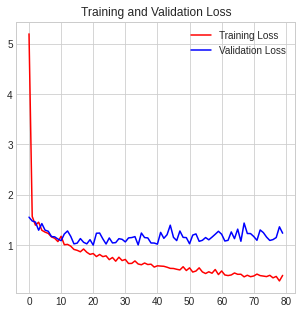

In [ ]:
plot_history(history_add_dense)

In [ ]:
model_add_dense.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dense
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 8  4  0  0  6  2]
 [ 3 32  0  0  6  0]
 [ 0  3 29  0  1  0]
 [ 2  2  4 13  2  0]
 [ 4  0  0  0 30  1]
 [ 0  1  0  0  0 15]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.47      0.40      0.43        20
           Herpes       0.76      0.78      0.77        41
     Lyme disease       0.88      0.88      0.88        33
       Poison ivy       1.00      0.57      0.72        23
        Psoriasis       0.67      0.86      0.75        35
          Rosacea       0.83      0.94      0.88        16

         accuracy                           0.76       168
        macro avg       0.77      0.74      0.74       168
     weighted avg       0.77      0.76      0.75       168



##Second.2 experiment
Here we will see how the model performs with two dense layers

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dense2 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dense2.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dense2 = model_add_dense2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 39s - loss: 2.6597 - accuracy: 0.2695 - val_loss: 1.4430 - val_accuracy: 0.4491 - 39s/epoch - 3s/step
Epoch 2/80
12/12 - 34s - loss: 1.5503 - accuracy: 0.3699 - val_loss: 1.3904 - val_accuracy: 0.4671 - 34s/epoch - 3s/step
Epoch 3/80
12/12 - 35s - loss: 1.4851 - accuracy: 0.4414 - val_loss: 1.2735 - val_accuracy: 0.5090 - 35s/epoch - 3s/step
Epoch 4/80
12/12 - 34s - loss: 1.3012 - accuracy: 0.4906 - val_loss: 1.2547 - val_accuracy: 0.5090 - 34s/epoch - 3s/step
Epoch 5/80
12/12 - 34s - loss: 1.2880 - accuracy: 0.5283 - val_loss: 1.2447 - val_accuracy: 0.5509 - 34s/epoch - 3s/step
Epoch 6/80
12/12 - 34s - loss: 1.1866 - accuracy: 0.5580 - val_loss: 1.1561 - val_accuracy: 0.5749 - 34s/epoch - 3s/step
Epoch 7/80
12/12 - 34s - loss: 1.1961 - accuracy: 0.5539 - val_loss: 1.1026 - val_accuracy: 0.6048 - 34s/epoch - 3s/step
Epoch 8/80
12/12 - 34s - loss: 1.1463 - accuracy: 0.5788 - val_loss: 1.1581 - val_accuracy: 0.5928 - 34s/epoch - 3s/step
Epoch 9/80
12/12 - 35s - loss: 1

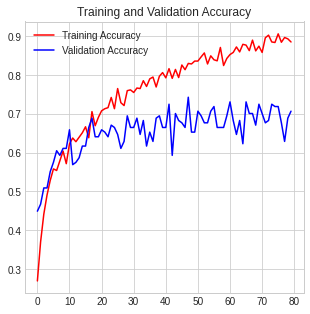

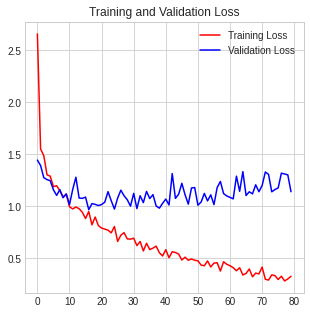

In [ ]:
plot_history(history_add_dense2)

In [ ]:
model_add_dense2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dense2
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[11  3  1  2  3  0]
 [ 1 33  2  4  1  0]
 [ 4  1 24  2  2  0]
 [ 4  4  3 10  2  0]
 [ 2  4  1  0 28  0]
 [ 0  2  0  0  1 12]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.50      0.55      0.52        20
           Herpes       0.70      0.80      0.75        41
     Lyme disease       0.77      0.73      0.75        33
       Poison ivy       0.56      0.43      0.49        23
        Psoriasis       0.76      0.80      0.78        35
          Rosacea       1.00      0.80      0.89        15

         accuracy                           0.71       167
        macro avg       0.71      0.69      0.70       167
     weighted avg       0.71      0.71      0.71       167



##Second.3 experiment
Here we will see how the model performs with 3 dense layers

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dense3 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dense3.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dense3 = model_add_dense3.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 38s - loss: 2.2735 - accuracy: 0.2480 - val_loss: 1.5439 - val_accuracy: 0.3832 - 38s/epoch - 3s/step
Epoch 2/80
12/12 - 35s - loss: 1.6366 - accuracy: 0.3477 - val_loss: 1.3676 - val_accuracy: 0.4910 - 35s/epoch - 3s/step
Epoch 3/80
12/12 - 34s - loss: 1.4313 - accuracy: 0.4313 - val_loss: 1.4370 - val_accuracy: 0.4072 - 34s/epoch - 3s/step
Epoch 4/80
12/12 - 34s - loss: 1.3616 - accuracy: 0.4555 - val_loss: 1.6538 - val_accuracy: 0.4132 - 34s/epoch - 3s/step
Epoch 5/80
12/12 - 34s - loss: 1.3131 - accuracy: 0.5013 - val_loss: 1.2253 - val_accuracy: 0.5629 - 34s/epoch - 3s/step
Epoch 6/80
12/12 - 34s - loss: 1.2671 - accuracy: 0.5229 - val_loss: 1.3488 - val_accuracy: 0.4611 - 34s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.1976 - accuracy: 0.5377 - val_loss: 1.1648 - val_accuracy: 0.5629 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.1410 - accuracy: 0.5782 - val_loss: 1.2598 - val_accuracy: 0.5150 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 35s - loss: 1

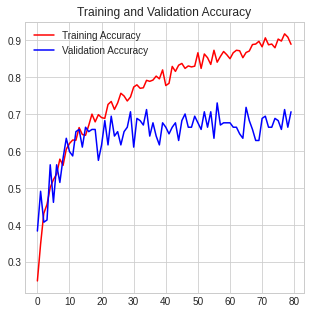

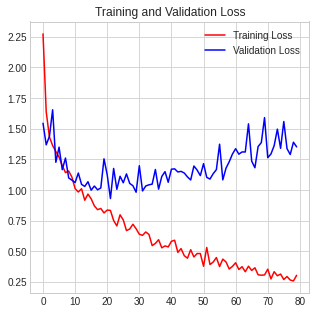

In [ ]:
plot_history(history_add_dense3)

In [ ]:
model_add_dense3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dense3
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[13  0  1  0  5  1]
 [ 2 29  2  3  3  2]
 [ 2  0 25  1  1  4]
 [ 5  3  4  8  3  0]
 [ 3  2  1  0 29  0]
 [ 0  1  0  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.52      0.65      0.58        20
           Herpes       0.83      0.71      0.76        41
     Lyme disease       0.76      0.76      0.76        33
       Poison ivy       0.67      0.35      0.46        23
        Psoriasis       0.71      0.83      0.76        35
          Rosacea       0.67      0.93      0.78        15

         accuracy                           0.71       167
        macro avg       0.69      0.70      0.68       167
     weighted avg       0.72      0.71      0.70       167



##Second.4 experiment
Here we will see how the model performs with 4 dense layers

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dense4 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dense4.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dense4 = model_add_dense4.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 38s - loss: 1.9464 - accuracy: 0.2298 - val_loss: 1.5653 - val_accuracy: 0.3772 - 38s/epoch - 3s/step
Epoch 2/80
12/12 - 33s - loss: 1.5711 - accuracy: 0.3464 - val_loss: 1.5023 - val_accuracy: 0.3772 - 33s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.4565 - accuracy: 0.3929 - val_loss: 1.3014 - val_accuracy: 0.5389 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 33s - loss: 1.4002 - accuracy: 0.4562 - val_loss: 1.2968 - val_accuracy: 0.4731 - 33s/epoch - 3s/step
Epoch 5/80
12/12 - 33s - loss: 1.2606 - accuracy: 0.5216 - val_loss: 1.2456 - val_accuracy: 0.5569 - 33s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.2548 - accuracy: 0.5162 - val_loss: 1.2468 - val_accuracy: 0.5749 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 34s - loss: 1.1597 - accuracy: 0.5539 - val_loss: 1.1707 - val_accuracy: 0.5868 - 34s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.2187 - accuracy: 0.5290 - val_loss: 1.1584 - val_accuracy: 0.5749 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

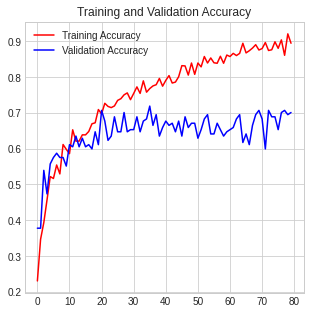

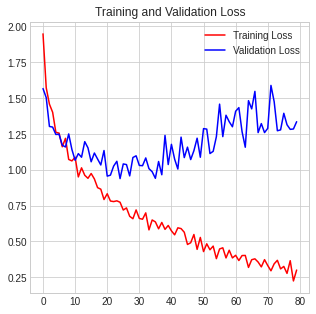

In [ ]:
plot_history(history_add_dense4)

In [ ]:
model_add_dense4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dense4
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[11  1  3  1  2  2]
 [ 1 31  3  3  1  2]
 [ 3  1 24  1  1  3]
 [ 4  4  5  8  2  0]
 [ 3  2  1  0 28  1]
 [ 0  0  0  0  0 15]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.50      0.55      0.52        20
           Herpes       0.79      0.76      0.77        41
     Lyme disease       0.67      0.73      0.70        33
       Poison ivy       0.62      0.35      0.44        23
        Psoriasis       0.82      0.80      0.81        35
          Rosacea       0.65      1.00      0.79        15

         accuracy                           0.70       167
        macro avg       0.68      0.70      0.67       167
     weighted avg       0.70      0.70      0.69       167



#Thrid experiment
Two layers of dense has the best performance, highest accuracy but not overfitting. The thrid and fourth model above overfits by far, so moving forward, we will now be using two dense layers on our model. Now adding dropout one by one to see how it affects our model. Starting from adding 40% dropout rate on our flatten layer.

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dropout = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dropout.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dropout = model_add_dropout.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 49s - loss: 2.4679 - accuracy: 0.2374 - val_loss: 1.5729 - val_accuracy: 0.3571 - 49s/epoch - 4s/step
Epoch 2/80
12/12 - 32s - loss: 1.5630 - accuracy: 0.3783 - val_loss: 1.4000 - val_accuracy: 0.5298 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.4510 - accuracy: 0.4349 - val_loss: 1.3002 - val_accuracy: 0.5179 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.3595 - accuracy: 0.4579 - val_loss: 1.2031 - val_accuracy: 0.5833 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.3058 - accuracy: 0.5051 - val_loss: 1.2670 - val_accuracy: 0.5298 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.2270 - accuracy: 0.5192 - val_loss: 1.0903 - val_accuracy: 0.6310 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.1829 - accuracy: 0.5556 - val_loss: 1.0862 - val_accuracy: 0.5893 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.1523 - accuracy: 0.5678 - val_loss: 1.5504 - val_accuracy: 0.4762 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

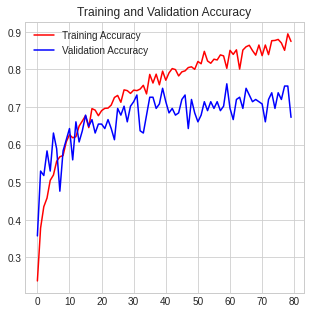

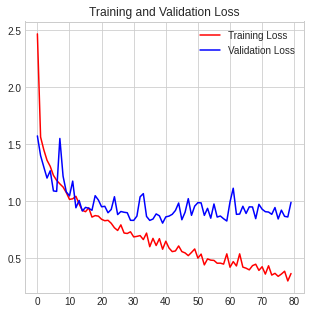

In [ ]:
plot_history(history_add_dropout)

In [ ]:
model_add_dropout.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dropout
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[10  0  1  2  5  2]
 [ 3 24  5  4  2  3]
 [ 1  0 31  1  0  0]
 [ 1  1  8 11  2  0]
 [ 3  1  4  1 23  3]
 [ 0  0  2  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.56      0.50      0.53        20
           Herpes       0.92      0.59      0.72        41
     Lyme disease       0.61      0.94      0.74        33
       Poison ivy       0.58      0.48      0.52        23
        Psoriasis       0.72      0.66      0.69        35
          Rosacea       0.64      0.88      0.74        16

         accuracy                           0.67       168
        macro avg       0.67      0.67      0.65       168
     weighted avg       0.70      0.67      0.67       168



##Thrid.2 experiment
Now adding dropout to the first dense layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dropout2 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dropout2.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dropout2 = model_add_dropout2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 37s - loss: 2.4001 - accuracy: 0.2313 - val_loss: 1.5846 - val_accuracy: 0.3452 - 37s/epoch - 3s/step
Epoch 2/80
12/12 - 32s - loss: 1.5578 - accuracy: 0.3587 - val_loss: 1.3575 - val_accuracy: 0.4524 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.4995 - accuracy: 0.3898 - val_loss: 1.3378 - val_accuracy: 0.5119 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.4306 - accuracy: 0.4396 - val_loss: 1.4096 - val_accuracy: 0.4107 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 33s - loss: 1.4081 - accuracy: 0.4417 - val_loss: 1.1652 - val_accuracy: 0.5714 - 33s/epoch - 3s/step
Epoch 6/80
12/12 - 32s - loss: 1.3312 - accuracy: 0.4720 - val_loss: 1.2032 - val_accuracy: 0.4881 - 32s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.2596 - accuracy: 0.5179 - val_loss: 1.1831 - val_accuracy: 0.4881 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.2077 - accuracy: 0.5482 - val_loss: 1.1529 - val_accuracy: 0.5476 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

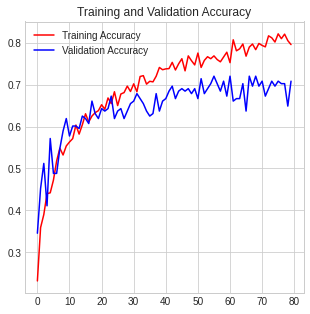

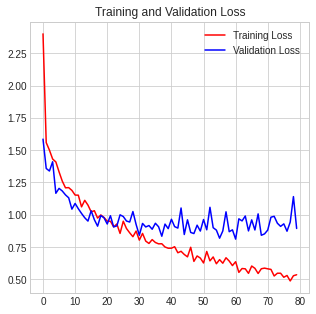

In [ ]:
plot_history(history_add_dropout2)

In [ ]:
model_add_dropout2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dropout2
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 8  1  0  2  6  3]
 [ 2 29  4  4  1  1]
 [ 1  1 29  2  0  0]
 [ 2  1  3 14  3  0]
 [ 2  2  2  1 25  3]
 [ 0  1  1  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.53      0.40      0.46        20
           Herpes       0.83      0.71      0.76        41
     Lyme disease       0.74      0.88      0.81        33
       Poison ivy       0.61      0.61      0.61        23
        Psoriasis       0.71      0.71      0.71        35
          Rosacea       0.67      0.88      0.76        16

         accuracy                           0.71       168
        macro avg       0.68      0.70      0.68       168
     weighted avg       0.71      0.71      0.70       168



##Thrid.3 experiment
Now adding dropout to the first and second dense layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dropout3 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dropout3.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dropout3 = model_add_dropout3.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 38s - loss: 2.1179 - accuracy: 0.2306 - val_loss: 1.5448 - val_accuracy: 0.4226 - 38s/epoch - 3s/step
Epoch 2/80
12/12 - 32s - loss: 1.6647 - accuracy: 0.3203 - val_loss: 1.3833 - val_accuracy: 0.5060 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.5599 - accuracy: 0.3742 - val_loss: 1.3341 - val_accuracy: 0.5357 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.4956 - accuracy: 0.4093 - val_loss: 1.2396 - val_accuracy: 0.5357 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.4551 - accuracy: 0.4282 - val_loss: 1.3703 - val_accuracy: 0.4583 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.4146 - accuracy: 0.4370 - val_loss: 1.2412 - val_accuracy: 0.5238 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.3621 - accuracy: 0.4592 - val_loss: 1.1445 - val_accuracy: 0.6012 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.3284 - accuracy: 0.4788 - val_loss: 1.0713 - val_accuracy: 0.5833 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

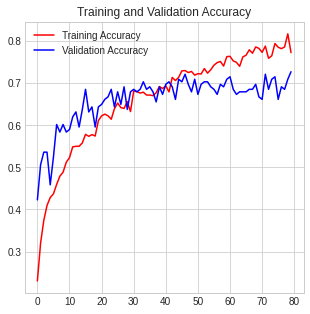

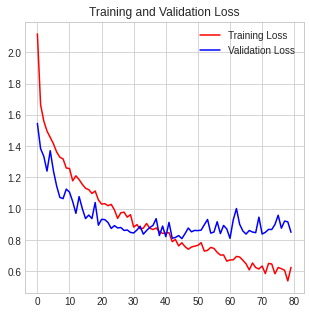

In [ ]:
plot_history(history_add_dropout3)

In [ ]:
model_add_dropout3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dropout3
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 8  1  0  2  7  2]
 [ 3 32  1  1  3  1]
 [ 2  1 27  2  1  0]
 [ 2  1  3 14  3  0]
 [ 2  1  1  2 27  2]
 [ 0  1  0  0  1 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.47      0.40      0.43        20
           Herpes       0.86      0.78      0.82        41
     Lyme disease       0.84      0.82      0.83        33
       Poison ivy       0.67      0.61      0.64        23
        Psoriasis       0.64      0.77      0.70        35
          Rosacea       0.74      0.88      0.80        16

         accuracy                           0.73       168
        macro avg       0.70      0.71      0.70       168
     weighted avg       0.73      0.73      0.72       168



##Thrid.4 experiment
Now adding dropout to the first and second dense layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dropout4 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dropout4.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dropout4 = model_add_dropout4.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 50s - loss: 2.7716 - accuracy: 0.2360 - val_loss: 1.6068 - val_accuracy: 0.2738 - 50s/epoch - 4s/step
Epoch 2/80
12/12 - 34s - loss: 1.5526 - accuracy: 0.3540 - val_loss: 1.3893 - val_accuracy: 0.4702 - 34s/epoch - 3s/step
Epoch 3/80
12/12 - 34s - loss: 1.4529 - accuracy: 0.4214 - val_loss: 1.3061 - val_accuracy: 0.5179 - 34s/epoch - 3s/step
Epoch 4/80
12/12 - 34s - loss: 1.3984 - accuracy: 0.4558 - val_loss: 1.2962 - val_accuracy: 0.5179 - 34s/epoch - 3s/step
Epoch 5/80
12/12 - 35s - loss: 1.3608 - accuracy: 0.4774 - val_loss: 1.2615 - val_accuracy: 0.5298 - 35s/epoch - 3s/step
Epoch 6/80
12/12 - 34s - loss: 1.2385 - accuracy: 0.5239 - val_loss: 1.4539 - val_accuracy: 0.5060 - 34s/epoch - 3s/step
Epoch 7/80
12/12 - 34s - loss: 1.2609 - accuracy: 0.5165 - val_loss: 1.2034 - val_accuracy: 0.5714 - 34s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.1929 - accuracy: 0.5496 - val_loss: 1.2387 - val_accuracy: 0.5476 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 34s - loss: 1

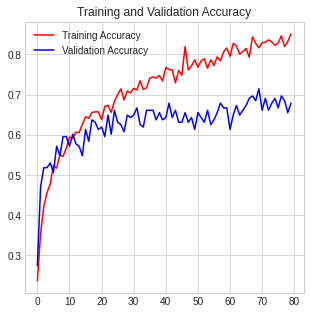

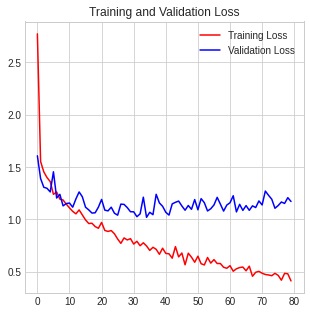

In [ ]:
plot_history(history_add_dropout4)

In [ ]:
model_add_dropout4.summary()

 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 17, 17, 128)  114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 17, 17, 128)  384        ['conv2d_35[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dropout4
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 8  3  1  6  1  1]
 [ 1 29  3  5  2  1]
 [ 1  3 25  3  1  0]
 [ 0  4  2 16  1  0]
 [ 2  6  1  2 23  1]
 [ 0  1  1  1  0 13]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.67      0.40      0.50        20
           Herpes       0.63      0.71      0.67        41
     Lyme disease       0.76      0.76      0.76        33
       Poison ivy       0.48      0.70      0.57        23
        Psoriasis       0.82      0.66      0.73        35
          Rosacea       0.81      0.81      0.81        16

         accuracy                           0.68       168
        macro avg       0.70      0.67      0.67       168
     weighted avg       0.70      0.68      0.68       168



##Thrid.5 experiment
Now adding dropout to the first and second dense layer

In [ ]:
5# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_dropout5 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_dropout5.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_dropout5 = model_add_dropout5.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 37s - loss: 2.7494 - accuracy: 0.2239 - val_loss: 1.5448 - val_accuracy: 0.3810 - 37s/epoch - 3s/step
Epoch 2/80
12/12 - 32s - loss: 1.6794 - accuracy: 0.3041 - val_loss: 1.4842 - val_accuracy: 0.4405 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.5533 - accuracy: 0.3742 - val_loss: 1.4392 - val_accuracy: 0.3929 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 34s - loss: 1.4875 - accuracy: 0.4046 - val_loss: 1.3701 - val_accuracy: 0.4821 - 34s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.4515 - accuracy: 0.4302 - val_loss: 1.3379 - val_accuracy: 0.4762 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 32s - loss: 1.3872 - accuracy: 0.4579 - val_loss: 1.2917 - val_accuracy: 0.5060 - 32s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.3439 - accuracy: 0.4875 - val_loss: 1.2367 - val_accuracy: 0.5357 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.3034 - accuracy: 0.5044 - val_loss: 1.2134 - val_accuracy: 0.5595 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

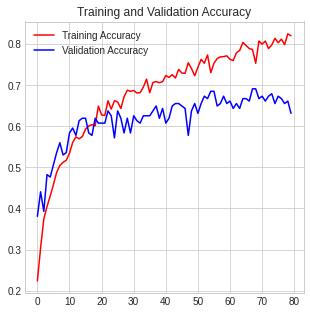

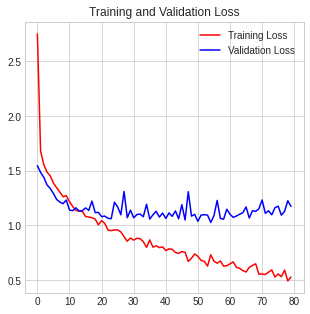

In [ ]:
plot_history(history_add_dropout5)

In [ ]:
model_add_dropout5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_dropout5
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[10  3  1  3  2  1]
 [ 4 29  5  1  1  1]
 [ 0  5 24  1  2  1]
 [ 5  5  2 10  1  0]
 [ 4  6  1  1 20  3]
 [ 0  1  1  1  0 13]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.43      0.50      0.47        20
           Herpes       0.59      0.71      0.64        41
     Lyme disease       0.71      0.73      0.72        33
       Poison ivy       0.59      0.43      0.50        23
        Psoriasis       0.77      0.57      0.66        35
          Rosacea       0.68      0.81      0.74        16

         accuracy                           0.63       168
        macro avg       0.63      0.63      0.62       168
     weighted avg       0.64      0.63      0.63       168



#Increasing neurons
Now we will see how increasing number of neurons will effect our model.

##Increase to 1024 on the first layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_neuron = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_neuron.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_neuron = model_add_neuron.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 49s - loss: 3.0153 - accuracy: 0.2158 - val_loss: 1.5241 - val_accuracy: 0.3452 - 49s/epoch - 4s/step
Epoch 2/80
12/12 - 37s - loss: 1.7041 - accuracy: 0.3169 - val_loss: 1.3912 - val_accuracy: 0.4345 - 37s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5918 - accuracy: 0.3594 - val_loss: 1.3616 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 35s - loss: 1.4914 - accuracy: 0.4134 - val_loss: 1.2529 - val_accuracy: 0.5060 - 35s/epoch - 3s/step
Epoch 5/80
12/12 - 33s - loss: 1.4683 - accuracy: 0.4295 - val_loss: 1.2696 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.4050 - accuracy: 0.4585 - val_loss: 1.1847 - val_accuracy: 0.5833 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.3675 - accuracy: 0.4761 - val_loss: 1.3571 - val_accuracy: 0.4881 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.3440 - accuracy: 0.4815 - val_loss: 1.1729 - val_accuracy: 0.5893 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 34s - loss: 1

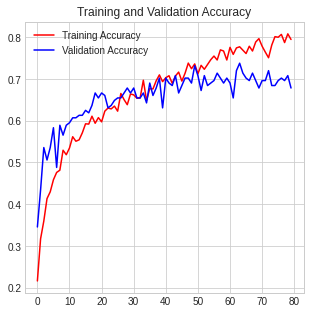

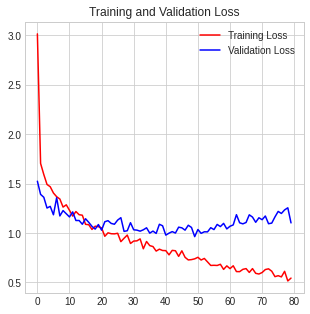

In [ ]:
plot_history(history_add_neuron)

In [ ]:
model_add_neuron.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_neuron
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[12  2  0  2  1  3]
 [ 0 35  2  3  1  0]
 [ 2  1 24  3  2  1]
 [ 0  4  3 12  3  1]
 [ 6  5  4  3 17  0]
 [ 0  2  0  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.60      0.60      0.60        20
           Herpes       0.71      0.85      0.78        41
     Lyme disease       0.73      0.73      0.73        33
       Poison ivy       0.52      0.52      0.52        23
        Psoriasis       0.71      0.49      0.58        35
          Rosacea       0.74      0.88      0.80        16

         accuracy                           0.68       168
        macro avg       0.67      0.68      0.67       168
     weighted avg       0.68      0.68      0.67       168



##Increase to 1024 on the first and second layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_neuron2 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_neuron2.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_neuron2 = model_add_neuron2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 37s - loss: 3.0423 - accuracy: 0.2252 - val_loss: 1.5141 - val_accuracy: 0.3274 - 37s/epoch - 3s/step
Epoch 2/80
12/12 - 33s - loss: 1.6484 - accuracy: 0.3149 - val_loss: 1.3893 - val_accuracy: 0.4881 - 33s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5442 - accuracy: 0.3790 - val_loss: 1.3038 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 33s - loss: 1.5302 - accuracy: 0.3945 - val_loss: 1.3959 - val_accuracy: 0.4643 - 33s/epoch - 3s/step
Epoch 5/80
12/12 - 33s - loss: 1.4449 - accuracy: 0.4390 - val_loss: 1.3029 - val_accuracy: 0.5774 - 33s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.3959 - accuracy: 0.4444 - val_loss: 1.1832 - val_accuracy: 0.5655 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.3498 - accuracy: 0.4713 - val_loss: 1.3449 - val_accuracy: 0.5238 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.2899 - accuracy: 0.5246 - val_loss: 1.2674 - val_accuracy: 0.5476 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 34s - loss: 1

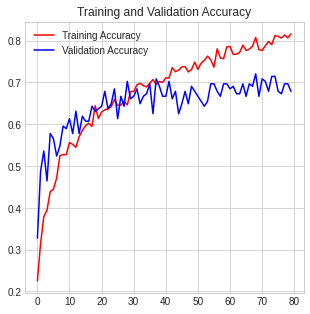

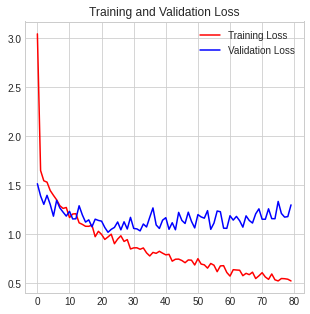

In [ ]:
plot_history(history_add_neuron2)

In [ ]:
model_add_neuron2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_neuron2
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[10  2  0  1  3  4]
 [ 2 34  1  0  4  0]
 [ 2  1 27  0  2  1]
 [ 2  5  3  6  6  1]
 [ 4  2  4  0 22  3]
 [ 0  1  0  0  0 15]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.50      0.50      0.50        20
           Herpes       0.76      0.83      0.79        41
     Lyme disease       0.77      0.82      0.79        33
       Poison ivy       0.86      0.26      0.40        23
        Psoriasis       0.59      0.63      0.61        35
          Rosacea       0.62      0.94      0.75        16

         accuracy                           0.68       168
        macro avg       0.68      0.66      0.64       168
     weighted avg       0.70      0.68      0.66       168



##Increase to 2048 on the first layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 2048 hidden units and ReLU activation
x = tf.keras.layers.Dense(2000, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_neuron3 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_neuron3.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_neuron3 = model_add_neuron3.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

In [ ]:
plot_history(history_add_neuron3)

In [ ]:
model_add_neuron3.summary()

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_neuron3
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

##Increase to 2048 on the first and second layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(2048, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(2048, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_add_neuron4 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_add_neuron4.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_add_neuron4 = model_add_neuron4.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

In [ ]:
plot_history(history_add_neuron4)

In [ ]:
model_add_neuron4.summary()

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_add_neuron4
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

#Decreasing neurons


##Decrease to 256 on the second layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_dec_neuron = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_dec_neuron.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_dec_neuron = model_dec_neuron.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 40s - loss: 3.0178 - accuracy: 0.2077 - val_loss: 1.6026 - val_accuracy: 0.3452 - 40s/epoch - 3s/step
Epoch 2/80
12/12 - 33s - loss: 1.7219 - accuracy: 0.2886 - val_loss: 1.4406 - val_accuracy: 0.4286 - 33s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5974 - accuracy: 0.3473 - val_loss: 1.3872 - val_accuracy: 0.5060 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 34s - loss: 1.5366 - accuracy: 0.3810 - val_loss: 1.3326 - val_accuracy: 0.5417 - 34s/epoch - 3s/step
Epoch 5/80
12/12 - 36s - loss: 1.4747 - accuracy: 0.4066 - val_loss: 1.2722 - val_accuracy: 0.5238 - 36s/epoch - 3s/step
Epoch 6/80
12/12 - 34s - loss: 1.4219 - accuracy: 0.4518 - val_loss: 1.2290 - val_accuracy: 0.5952 - 34s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.4136 - accuracy: 0.4484 - val_loss: 1.1934 - val_accuracy: 0.6131 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.3467 - accuracy: 0.4943 - val_loss: 1.1833 - val_accuracy: 0.6071 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

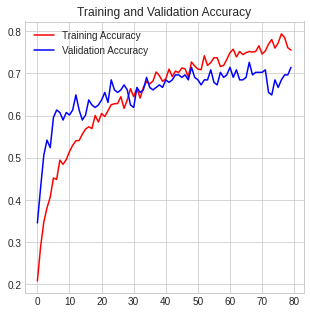

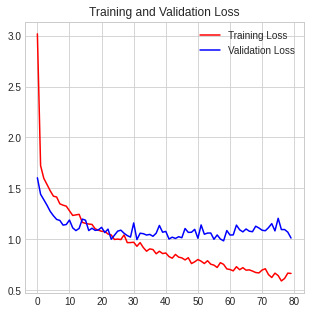

In [ ]:
plot_history(history_dec_neuron)

In [ ]:
model_dec_neuron.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_dec_neuron
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[10  3  0  1  3  3]
 [ 2 37  2  0  0  0]
 [ 1  1 28  0  2  1]
 [ 0  5  3 11  3  1]
 [ 3  7  4  1 19  1]
 [ 0  1  0  0  0 15]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.62      0.50      0.56        20
           Herpes       0.69      0.90      0.78        41
     Lyme disease       0.76      0.85      0.80        33
       Poison ivy       0.85      0.48      0.61        23
        Psoriasis       0.70      0.54      0.61        35
          Rosacea       0.71      0.94      0.81        16

         accuracy                           0.71       168
        macro avg       0.72      0.70      0.69       168
     weighted avg       0.72      0.71      0.70       168



##Decrease to 256 on the first and second layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_dec_neuron2 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_dec_neuron2.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_dec_neuron2 = model_dec_neuron2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 38s - loss: 1.9906 - accuracy: 0.2111 - val_loss: 1.5894 - val_accuracy: 0.3512 - 38s/epoch - 3s/step
Epoch 2/80
12/12 - 34s - loss: 1.6679 - accuracy: 0.3196 - val_loss: 1.4647 - val_accuracy: 0.4583 - 34s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5882 - accuracy: 0.3500 - val_loss: 1.3815 - val_accuracy: 0.4940 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 35s - loss: 1.5337 - accuracy: 0.3763 - val_loss: 1.3054 - val_accuracy: 0.4821 - 35s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.5167 - accuracy: 0.3999 - val_loss: 1.2887 - val_accuracy: 0.5238 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.4466 - accuracy: 0.4450 - val_loss: 1.2863 - val_accuracy: 0.5417 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.3602 - accuracy: 0.4882 - val_loss: 1.2184 - val_accuracy: 0.5833 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 34s - loss: 1.4063 - accuracy: 0.4680 - val_loss: 1.1911 - val_accuracy: 0.5536 - 34s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

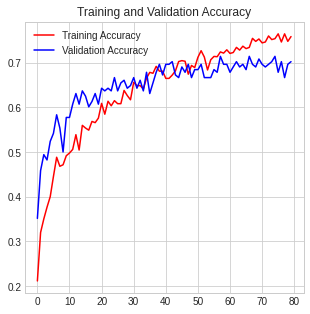

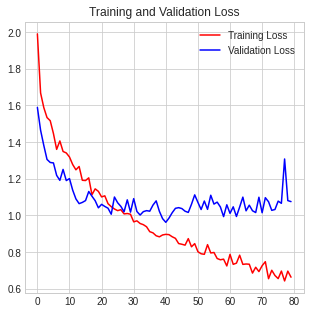

In [ ]:
plot_history(history_dec_neuron2)

In [ ]:
model_dec_neuron2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_dec_neuron2
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 9  2  0  1  4  4]
 [ 0 29  1  0 10  1]
 [ 2  1 25  0  4  1]
 [ 0  1  3 13  5  1]
 [ 3  2  4  0 26  0]
 [ 0  0  0  0  0 16]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.64      0.45      0.53        20
           Herpes       0.83      0.71      0.76        41
     Lyme disease       0.76      0.76      0.76        33
       Poison ivy       0.93      0.57      0.70        23
        Psoriasis       0.53      0.74      0.62        35
          Rosacea       0.70      1.00      0.82        16

         accuracy                           0.70       168
        macro avg       0.73      0.70      0.70       168
     weighted avg       0.73      0.70      0.70       168



#Messing with dropout rates



##Increase dropout rate on the first dense

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.5)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout1 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout1.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout1 = model_ch_dropout1.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 49s - loss: 2.2462 - accuracy: 0.2204 - val_loss: 1.5605 - val_accuracy: 0.3114 - 49s/epoch - 4s/step
Epoch 2/80
12/12 - 32s - loss: 1.6922 - accuracy: 0.2931 - val_loss: 1.5013 - val_accuracy: 0.4192 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.6294 - accuracy: 0.3255 - val_loss: 1.4111 - val_accuracy: 0.4251 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.5456 - accuracy: 0.3679 - val_loss: 1.3499 - val_accuracy: 0.5030 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.5054 - accuracy: 0.4036 - val_loss: 1.2566 - val_accuracy: 0.5090 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 32s - loss: 1.4923 - accuracy: 0.4016 - val_loss: 1.3099 - val_accuracy: 0.4731 - 32s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.4251 - accuracy: 0.4245 - val_loss: 1.2425 - val_accuracy: 0.5150 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.3901 - accuracy: 0.4650 - val_loss: 1.2186 - val_accuracy: 0.5150 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

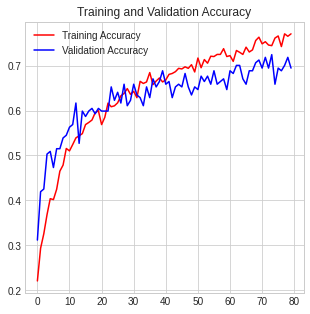

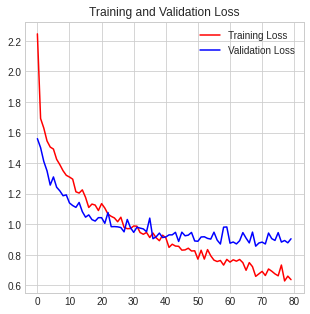

In [ ]:
plot_history(history_ch_dropout1)

In [ ]:
model_ch_dropout1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout1
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[12  1  2  1  4  0]
 [ 2 31  3  2  3  0]
 [ 1  1 27  1  2  1]
 [ 4  3  4  9  3  0]
 [ 4  3  2  0 24  2]
 [ 1  0  1  0  0 13]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.50      0.60      0.55        20
           Herpes       0.79      0.76      0.77        41
     Lyme disease       0.69      0.82      0.75        33
       Poison ivy       0.69      0.39      0.50        23
        Psoriasis       0.67      0.69      0.68        35
          Rosacea       0.81      0.87      0.84        15

         accuracy                           0.69       167
        macro avg       0.69      0.69      0.68       167
     weighted avg       0.70      0.69      0.69       167



##Increase dropout rate on the second dense

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.5)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout2 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout2.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout2 = model_ch_dropout2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 38s - loss: 2.2336 - accuracy: 0.2177 - val_loss: 1.4914 - val_accuracy: 0.4371 - 38s/epoch - 3s/step
Epoch 2/80
12/12 - 32s - loss: 1.6951 - accuracy: 0.3039 - val_loss: 1.4018 - val_accuracy: 0.4790 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5963 - accuracy: 0.3430 - val_loss: 1.3813 - val_accuracy: 0.4371 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.5221 - accuracy: 0.3996 - val_loss: 1.3327 - val_accuracy: 0.4132 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 34s - loss: 1.4932 - accuracy: 0.4036 - val_loss: 1.3308 - val_accuracy: 0.4910 - 34s/epoch - 3s/step
Epoch 6/80
12/12 - 32s - loss: 1.4584 - accuracy: 0.4373 - val_loss: 1.2572 - val_accuracy: 0.5210 - 32s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.3918 - accuracy: 0.4650 - val_loss: 1.2376 - val_accuracy: 0.5150 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.3965 - accuracy: 0.4629 - val_loss: 1.2205 - val_accuracy: 0.5389 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

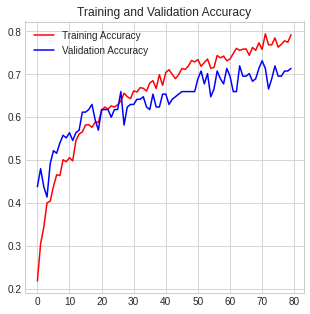

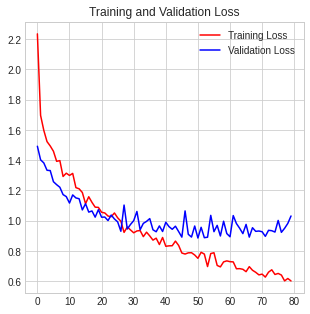

In [ ]:
plot_history(history_ch_dropout2)

In [ ]:
model_ch_dropout2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout2
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[11  1  1  1  6  0]
 [ 2 29  2  1  7  0]
 [ 0  4 24  0  5  0]
 [ 2  5  1 10  5  0]
 [ 1  0  1  0 32  1]
 [ 0  1  1  0  0 13]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.69      0.55      0.61        20
           Herpes       0.72      0.71      0.72        41
     Lyme disease       0.80      0.73      0.76        33
       Poison ivy       0.83      0.43      0.57        23
        Psoriasis       0.58      0.91      0.71        35
          Rosacea       0.93      0.87      0.90        15

         accuracy                           0.71       167
        macro avg       0.76      0.70      0.71       167
     weighted avg       0.74      0.71      0.71       167



##Increase dropout rate on the both dense

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.5)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.5)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout3 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout3.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout3 = model_ch_dropout3.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 36s - loss: 2.0734 - accuracy: 0.2439 - val_loss: 1.5845 - val_accuracy: 0.4012 - 36s/epoch - 3s/step
Epoch 2/80
12/12 - 32s - loss: 1.7044 - accuracy: 0.2999 - val_loss: 1.4930 - val_accuracy: 0.4371 - 32s/epoch - 3s/step
Epoch 3/80
12/12 - 32s - loss: 1.6427 - accuracy: 0.3295 - val_loss: 1.4530 - val_accuracy: 0.4311 - 32s/epoch - 3s/step
Epoch 4/80
12/12 - 32s - loss: 1.5966 - accuracy: 0.3504 - val_loss: 1.4040 - val_accuracy: 0.5030 - 32s/epoch - 3s/step
Epoch 5/80
12/12 - 32s - loss: 1.5459 - accuracy: 0.3841 - val_loss: 1.3396 - val_accuracy: 0.4910 - 32s/epoch - 3s/step
Epoch 6/80
12/12 - 32s - loss: 1.5265 - accuracy: 0.3942 - val_loss: 1.3315 - val_accuracy: 0.4970 - 32s/epoch - 3s/step
Epoch 7/80
12/12 - 32s - loss: 1.4508 - accuracy: 0.4299 - val_loss: 1.2342 - val_accuracy: 0.5210 - 32s/epoch - 3s/step
Epoch 8/80
12/12 - 32s - loss: 1.4013 - accuracy: 0.4643 - val_loss: 1.2236 - val_accuracy: 0.5569 - 32s/epoch - 3s/step
Epoch 9/80
12/12 - 32s - loss: 1

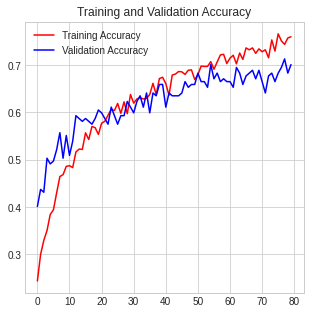

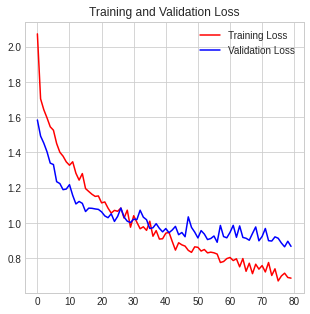

In [ ]:
plot_history(history_ch_dropout3)

In [ ]:
model_ch_dropout3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout3
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 167 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[11  2  1  2  4  0]
 [ 3 32  3  1  2  0]
 [ 1  2 27  0  1  2]
 [ 5  3  2 10  3  0]
 [ 3  4  2  0 23  3]
 [ 1  0  0  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.46      0.55      0.50        20
           Herpes       0.74      0.78      0.76        41
     Lyme disease       0.77      0.82      0.79        33
       Poison ivy       0.77      0.43      0.56        23
        Psoriasis       0.70      0.66      0.68        35
          Rosacea       0.74      0.93      0.82        15

         accuracy                           0.70       167
        macro avg       0.70      0.70      0.69       167
     weighted avg       0.71      0.70      0.70       167



##Increase dropout rate on flatten layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout4 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout4.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout4 = model_ch_dropout4.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 49s - loss: 2.1155 - accuracy: 0.2313 - val_loss: 1.5642 - val_accuracy: 0.3333 - 49s/epoch - 4s/step
Epoch 2/80
12/12 - 33s - loss: 1.6389 - accuracy: 0.3311 - val_loss: 1.4467 - val_accuracy: 0.3512 - 33s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.6011 - accuracy: 0.3432 - val_loss: 1.3221 - val_accuracy: 0.4762 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 33s - loss: 1.5186 - accuracy: 0.3931 - val_loss: 1.2460 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 5/80
12/12 - 35s - loss: 1.4724 - accuracy: 0.4282 - val_loss: 1.1952 - val_accuracy: 0.5298 - 35s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.3971 - accuracy: 0.4531 - val_loss: 1.0895 - val_accuracy: 0.5833 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.3845 - accuracy: 0.4531 - val_loss: 1.0964 - val_accuracy: 0.5536 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 33s - loss: 1.3020 - accuracy: 0.4929 - val_loss: 1.1020 - val_accuracy: 0.5833 - 33s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

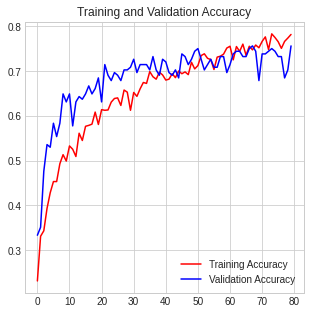

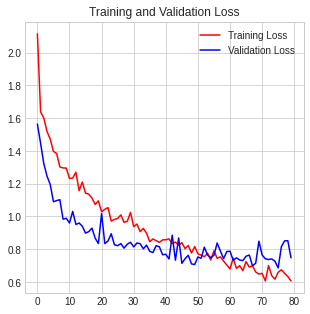

In [ ]:
plot_history(history_ch_dropout4)

In [ ]:
model_ch_dropout4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout4
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[11  2  1  1  5  0]
 [ 0 33  1  2  4  1]
 [ 2  1 27  2  1  0]
 [ 3  2  1 15  2  0]
 [ 2  3  0  2 28  0]
 [ 0  1  2  0  0 13]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.61      0.55      0.58        20
           Herpes       0.79      0.80      0.80        41
     Lyme disease       0.84      0.82      0.83        33
       Poison ivy       0.68      0.65      0.67        23
        Psoriasis       0.70      0.80      0.75        35
          Rosacea       0.93      0.81      0.87        16

         accuracy                           0.76       168
        macro avg       0.76      0.74      0.75       168
     weighted avg       0.76      0.76      0.76       168



##Decrease dropout rate on flatten layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.3)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout5 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout5.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout5 = model_ch_dropout5.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 39s - loss: 2.2798 - accuracy: 0.2252 - val_loss: 1.4966 - val_accuracy: 0.4107 - 39s/epoch - 3s/step
Epoch 2/80
12/12 - 33s - loss: 1.6554 - accuracy: 0.3358 - val_loss: 1.3894 - val_accuracy: 0.4345 - 33s/epoch - 3s/step
Epoch 3/80
12/12 - 33s - loss: 1.5983 - accuracy: 0.3500 - val_loss: 1.2842 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 4/80
12/12 - 33s - loss: 1.5255 - accuracy: 0.3904 - val_loss: 1.3033 - val_accuracy: 0.4821 - 33s/epoch - 3s/step
Epoch 5/80
12/12 - 33s - loss: 1.4515 - accuracy: 0.4174 - val_loss: 1.1454 - val_accuracy: 0.6012 - 33s/epoch - 3s/step
Epoch 6/80
12/12 - 33s - loss: 1.4086 - accuracy: 0.4606 - val_loss: 1.2055 - val_accuracy: 0.5357 - 33s/epoch - 3s/step
Epoch 7/80
12/12 - 33s - loss: 1.3687 - accuracy: 0.4754 - val_loss: 1.0483 - val_accuracy: 0.6369 - 33s/epoch - 3s/step
Epoch 8/80
12/12 - 34s - loss: 1.3736 - accuracy: 0.4794 - val_loss: 1.0430 - val_accuracy: 0.6429 - 34s/epoch - 3s/step
Epoch 9/80
12/12 - 33s - loss: 1

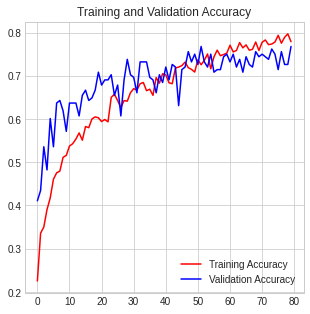

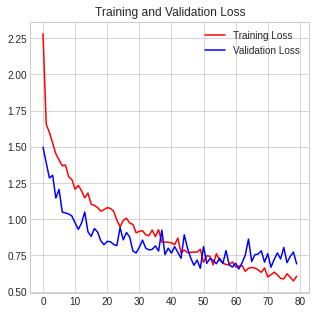

In [ ]:
plot_history(history_ch_dropout5)

In [ ]:
model_ch_dropout5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout5
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[10  1  2  3  3  1]
 [ 0 31  2  5  1  2]
 [ 0  0 30  3  0  0]
 [ 0  3  2 17  1  0]
 [ 3  3  0  2 27  0]
 [ 0  0  2  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.77      0.50      0.61        20
           Herpes       0.82      0.76      0.78        41
     Lyme disease       0.79      0.91      0.85        33
       Poison ivy       0.57      0.74      0.64        23
        Psoriasis       0.84      0.77      0.81        35
          Rosacea       0.82      0.88      0.85        16

         accuracy                           0.77       168
        macro avg       0.77      0.76      0.76       168
     weighted avg       0.78      0.77      0.77       168



##Decrease dropout rate on flatten layer

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.2)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

# Create the complete model by using the Model class
model_ch_dropout6 = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model_ch_dropout6.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

callbacks = myCallback()
history_ch_dropout6 = model_ch_dropout6.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 80,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/80
12/12 - 41s - loss: 2.4849 - accuracy: 0.2394 - val_loss: 1.4873 - val_accuracy: 0.4167 - 41s/epoch - 3s/step
Epoch 2/80
12/12 - 36s - loss: 1.6689 - accuracy: 0.3095 - val_loss: 1.4023 - val_accuracy: 0.4405 - 36s/epoch - 3s/step
Epoch 3/80
12/12 - 36s - loss: 1.5821 - accuracy: 0.3675 - val_loss: 1.2509 - val_accuracy: 0.5952 - 36s/epoch - 3s/step
Epoch 4/80
12/12 - 36s - loss: 1.5174 - accuracy: 0.3965 - val_loss: 1.2360 - val_accuracy: 0.5060 - 36s/epoch - 3s/step
Epoch 5/80
12/12 - 38s - loss: 1.4183 - accuracy: 0.4376 - val_loss: 1.1546 - val_accuracy: 0.5952 - 38s/epoch - 3s/step
Epoch 6/80
12/12 - 36s - loss: 1.4253 - accuracy: 0.4457 - val_loss: 1.1912 - val_accuracy: 0.5060 - 36s/epoch - 3s/step
Epoch 7/80
12/12 - 36s - loss: 1.3830 - accuracy: 0.4747 - val_loss: 1.1027 - val_accuracy: 0.5417 - 36s/epoch - 3s/step
Epoch 8/80
12/12 - 37s - loss: 1.3622 - accuracy: 0.4869 - val_loss: 1.0597 - val_accuracy: 0.6190 - 37s/epoch - 3s/step
Epoch 9/80
12/12 - 36s - loss: 1

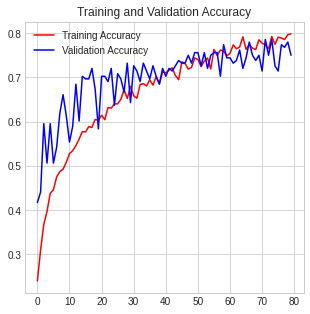

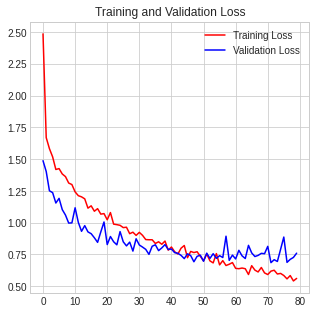

In [ ]:
plot_history(history_ch_dropout6)

In [ ]:
model_ch_dropout6.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = model_ch_dropout6
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[ 8  3  1  1  6  1]
 [ 0 32  1  2  5  1]
 [ 0  0 30  2  1  0]
 [ 1  3  3 13  3  0]
 [ 3  3  0  0 29  0]
 [ 0  0  2  0  0 14]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.67      0.40      0.50        20
           Herpes       0.78      0.78      0.78        41
     Lyme disease       0.81      0.91      0.86        33
       Poison ivy       0.72      0.57      0.63        23
        Psoriasis       0.66      0.83      0.73        35
          Rosacea       0.88      0.88      0.88        16

         accuracy                           0.75       168
        macro avg       0.75      0.73      0.73       168
     weighted avg       0.75      0.75      0.74       168



#Saving final model

Our model with 512 neurons on both dense layer and 30%, 40% and 40% dropout rates has the best results. So let's save and download this model.

In [16]:
model_ch_dropout5.save_weights('model_weights.h5')
model_ch_dropout5.save('model.h5')

#Demonstation model

In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.4)(x) 
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.3
x = tf.keras.layers.Dropout(0.3)(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Add a final dropout layer
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x)        

# Create the complete model by using the Model class
model = tf.keras.Model(pre_trained_model.input, x)

# Compile the model
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 65,862,566 total parameters in this model.
There are 56,887,302 trainable parameters in this model.


In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/100
12/12 - 45s - loss: 2.2460 - accuracy: 0.2379 - val_loss: 1.5488 - val_accuracy: 0.3593 - 45s/epoch - 4s/step
Epoch 2/100
12/12 - 35s - loss: 1.5817 - accuracy: 0.3470 - val_loss: 1.4090 - val_accuracy: 0.4491 - 35s/epoch - 3s/step
Epoch 3/100
12/12 - 34s - loss: 1.5023 - accuracy: 0.3922 - val_loss: 1.3008 - val_accuracy: 0.5629 - 34s/epoch - 3s/step
Epoch 4/100
12/12 - 34s - loss: 1.4470 - accuracy: 0.4205 - val_loss: 1.2393 - val_accuracy: 0.5749 - 34s/epoch - 3s/step
Epoch 5/100
12/12 - 34s - loss: 1.3944 - accuracy: 0.4717 - val_loss: 1.1802 - val_accuracy: 0.5569 - 34s/epoch - 3s/step
Epoch 6/100
12/12 - 34s - loss: 1.3418 - accuracy: 0.4737 - val_loss: 1.1672 - val_accuracy: 0.5389 - 34s/epoch - 3s/step
Epoch 7/100
12/12 - 35s - loss: 1.2645 - accuracy: 0.5377 - val_loss: 1.1299 - val_accuracy: 0.5629 - 35s/epoch - 3s/step
Epoch 8/100
12/12 - 34s - loss: 1.2487 - accuracy: 0.5270 - val_loss: 1.0778 - val_accuracy: 0.5749 - 34s/epoch - 3s/step
Epoch 9/100
12/12 - 34s 

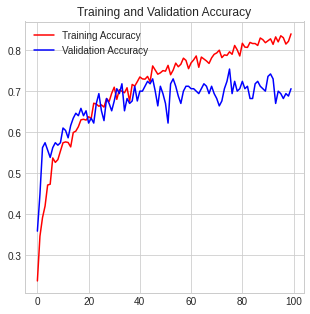

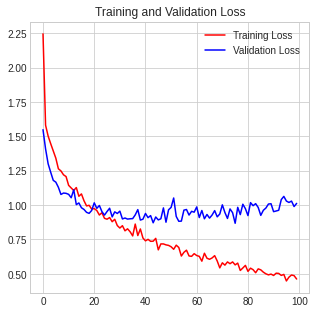

In [ ]:
plot_history(history)

In [ ]:
model.save_weights('model_weights.h5')
model.save('model.h5')

Save the model for future use without retraining the whole notebook to save time

#Predicting using our inceptionv3 model
First we need to load our saved model.

In [ ]:
import tensorflow as tf
CNN_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Skin disease/model.h5')

#CNN_model.summary()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
from tensorflow.keras.utils import load_img, img_to_array 

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img =tf.keras.utils.load_img(path, target_size=(300, 300))
  x = tf.keras.utils.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = CNN_model.predict(images, batch_size=10)
  print(classes[0])
  if max(classes[0])==classes[0][0]:
    print("Atopic dermatitis")
  elif max(classes[0])==classes[0][1]:
    print("Herpes")
  elif max(classes[0])==classes[0][2]:
    print("Lyme disease")
  elif max(classes[0])==classes[0][3]:
    print("Poison ivy")
  elif max(classes[0])==classes[0][4]:
    print("Psoriasis")
  elif max(classes[0])==classes[0][5]:
    print("Rosacea")  

Saving dermatitis.jpg to dermatitis.jpg
Saving lyme.jpg to lyme.jpg
1/1 [==============================] - 8s 8s/step
[9.8445636e-01 4.8493344e-04 4.6826690e-04 1.0183056e-02 4.3796697e-03
 2.7634140e-05]
Atopic dermatitis
1/1 [==============================] - 0s 24ms/step
[6.7519295e-06 1.2375387e-04 7.9558665e-01 2.0427112e-01 8.5036900e-06
 3.2748958e-06]
Lyme disease


#Visualizing convolutions

1/1 [==============================] - 0s 28ms/step


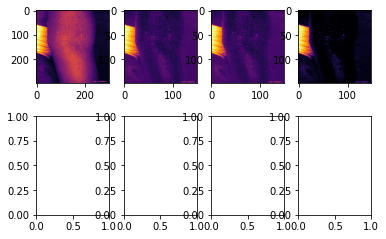

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
import numpy as np
from IPython.display import Image
from PIL import Image
f, axarr = plt.subplots(2,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 2

Atopic_img = Image.open('/tmp/Disease/training/Atopic dermatitis/image.jpg')
Atopic_img = Atopic_img.resize((300,300))
Atopic_img = np.array(Atopic_img)


layer_outputs = [layer.output for layer in CNN_model.layers]
activation_model = tf.keras.models.Model(inputs = CNN_model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(Atopic_img.reshape(1, 300, 300, 3))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
#  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
#  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
#  axarr[1,x].grid(False)
  
#  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
#  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
#  axarr[2,x].grid(False)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib as plt
x_train = Image.open('/tmp/Disease/training/Atopic dermatitis/image.jpg')
x_train = x_train.resize((300,300))
x_train = np.array(x_train)
x_train = x_train.reshape((1,300,300,3))
print(x_train)

[[[[127  79  65]
   [126  78  64]
   [126  78  64]
   ...
   [ 20  17  24]
   [ 20  17  24]
   [ 20  17  24]]

  [[132  84  70]
   [131  83  69]
   [129  81  67]
   ...
   [ 20  17  24]
   [ 20  17  24]
   [ 20  17  24]]

  [[127  79  65]
   [128  80  66]
   [129  81  67]
   ...
   [ 20  17  24]
   [ 20  17  24]
   [ 20  17  24]]

  ...

  [[ 64  49  54]
   [ 62  48  53]
   [ 59  45  50]
   ...
   [ 14  12  15]
   [ 14  12  15]
   [ 14  12  15]]

  [[ 58  43  48]
   [ 59  44  49]
   [ 62  46  52]
   ...
   [ 14  12  15]
   [ 14  12  15]
   [ 14  12  15]]

  [[ 56  39  45]
   [ 57  40  46]
   [ 60  43  49]
   ...
   [ 14  12  15]
   [ 14  12  15]
   [ 14  12  15]]]]


#Performance evaluation

In [ ]:
num_of_test_samples = 168
from sklearn.metrics import classification_report, confusion_matrix

model = CNN_model
validation_generator = validation_datagen.flow_from_directory(TESTING_DIR,
                                                              batch_size=168,
                                                              class_mode='categorical',
                                                              target_size=(300,300),
                                                              shuffle = False)

filenames = validation_generator.filenames
nb_samples = len(filenames)
Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Atopic dermatitis', 'Herpes', 'Lyme disease', 'Poison ivy', 'Psoriasis', 'Rosacea']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 168 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Confusion Matrix
[[14  1  1  0  2  2]
 [ 0 38  1  0  1  1]
 [ 0  0 30  1  1  1]
 [ 1  0  0 22  0  0]
 [ 1  0  1  0 33  0]
 [ 0  0  0  0  0 16]]
Classification Report
                   precision    recall  f1-score   support

Atopic dermatitis       0.88      0.70      0.78        20
           Herpes       0.97      0.93      0.95        41
     Lyme disease       0.91      0.91      0.91        33
       Poison ivy       0.96      0.96      0.96        23
        Psoriasis       0.89      0.94      0.92        35
          Rosacea       0.80      1.00      0.89        16

         accuracy                           0.91       168
        macro avg       0.90      0.91      0.90       168
     weighted avg       0.91      0.91      0.91       168



In [ ]:
def find_fasle_prediction(prediction, actual):
  disease_dict = {
    0: 'Atopic dermatitis',
    1: 'Herpes',
    2: 'Lyme disease',
    3: 'Poison ivy',
    4: 'Psoriasis',
    5: 'Rosacea'
  }
  wrong_index = list()
  wrong_prediction = list()
  actual_label = list()
  for i in range(len(prediction)):
    if prediction[i] == actual[i]:
      pass
    else:
      wrong_index.append(i)
      wrong_prediction.append(disease_dict[prediction[i]])
      actual_label.append(disease_dict[actual[i]])

    df = pd.DataFrame(list(zip(wrong_index, wrong_prediction, actual_label)),
                      columns = ['Index', 'Predicted Label', 'Actual Label'])
  
  return df

In [ ]:
false_classification = find_fasle_prediction(y_pred, validation_generator.classes)
false_classification

Index    Predicted Label       Actual Label
0       8            Rosacea  Atopic dermatitis
1      10       Lyme disease  Atopic dermatitis
2      13             Herpes  Atopic dermatitis
3      16          Psoriasis  Atopic dermatitis
4      17            Rosacea  Atopic dermatitis
5      18          Psoriasis  Atopic dermatitis
6      41          Psoriasis             Herpes
7      48            Rosacea             Herpes
8      60       Lyme disease             Herpes
9      71            Rosacea       Lyme disease
10     75         Poison ivy       Lyme disease
11     81          Psoriasis       Lyme disease
12     97  Atopic dermatitis         Poison ivy
13    121  Atopic dermatitis          Psoriasis
14    148       Lyme disease          Psoriasis

In [ ]:
import matplotlib.pyplot as plt
def show_misclassified(index):
  x,y = validation_generator.next()
  image = x[index]
  print('==================')
  plt.figure(figsize=(3,3))
  plt.imshow(image)
  plt.show()
  print('Actual Image :', str(false_classification[false_classification['Index']==index]['Actual Label'].values)[2:-2])
  print('Predicted Label:', str(false_classification[false_classification['Index']==index]['Predicted Label'].values)[2:-2])
  print('==================')

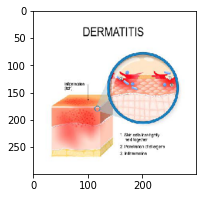

Actual Image : Atopic dermatitis
Predicted Label: Rosacea


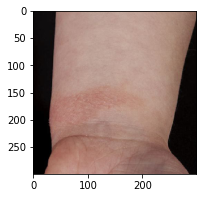

Actual Image : Atopic dermatitis
Predicted Label: Lyme disease


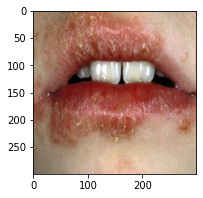

Actual Image : Atopic dermatitis
Predicted Label: Herpes


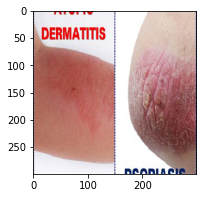

Actual Image : Atopic dermatitis
Predicted Label: Psoriasis


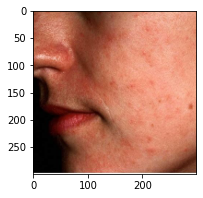

Actual Image : Atopic dermatitis
Predicted Label: Rosacea


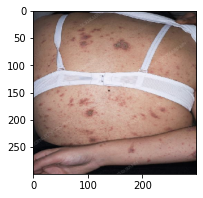

Actual Image : Atopic dermatitis
Predicted Label: Psoriasis


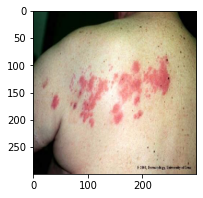

Actual Image : Herpes
Predicted Label: Psoriasis


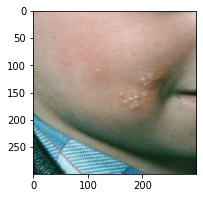

Actual Image : Herpes
Predicted Label: Rosacea


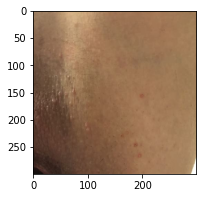

Actual Image : Herpes
Predicted Label: Lyme disease


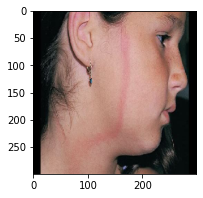

Actual Image : Lyme disease
Predicted Label: Rosacea


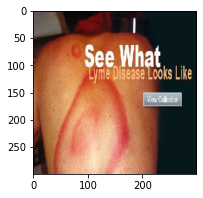

Actual Image : Lyme disease
Predicted Label: Poison ivy


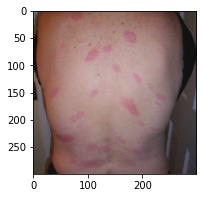

Actual Image : Lyme disease
Predicted Label: Psoriasis


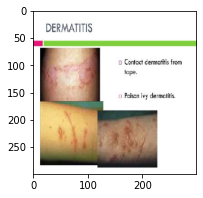

Actual Image : Poison ivy
Predicted Label: Atopic dermatitis


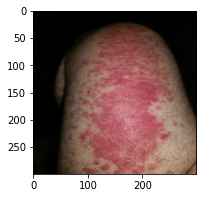

Actual Image : Psoriasis
Predicted Label: Atopic dermatitis


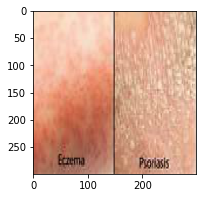

Actual Image : Psoriasis
Predicted Label: Lyme disease


In [ ]:
for index in false_classification.Index:
  show_misclassified(index)